Examples
---

- [digits](#Digits)
- [MNIST](#MNIST)
- [IRIS](#IRIS)
- [Wine](#Wine)
- [Breast Cancer](#Breast-Cancer)
- [CovType](#CovType)

In [1]:
import emby
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time

Digits
---

epoch 0  /  20000  --  134977.58007553095
epoch 1000  /  20000  --  116552.29630117296
epoch 2000  /  20000  --  107215.30933476624
epoch 3000  /  20000  --  126004.73464661179
epoch 4000  /  20000  --  122778.76079053708
epoch 5000  /  20000  --  105344.23419364139
epoch 6000  /  20000  --  118643.98385323433
epoch 7000  /  20000  --  105771.13093827794
epoch 8000  /  20000  --  102163.62083172932
epoch 9000  /  20000  --  108643.79635108564
epoch 10000  /  20000  --  89751.40157351881
epoch 11000  /  20000  --  107845.33104620787
epoch 12000  /  20000  --  106179.45618000708
epoch 13000  /  20000  --  98221.34256370632
epoch 14000  /  20000  --  80528.75085160878
epoch 15000  /  20000  --  76588.88859749076
epoch 16000  /  20000  --  67484.48755777298
epoch 17000  /  20000  --  59161.70779500251
epoch 18000  /  20000  --  34077.786495917746
epoch 19000  /  20000  --  20235.93566724102
Time to fit transform 16.91947603225708


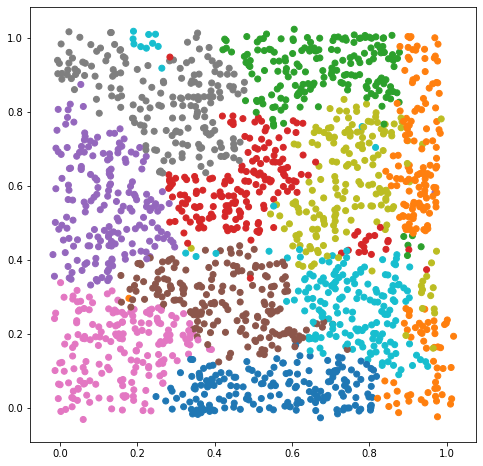

CPU times: user 17.3 s, sys: 209 ms, total: 17.6 s
Wall time: 17.2 s


In [4]:
%%time
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               bases=1000, 
               epochs=20000,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


MNIST
---

In [ ]:
import tensorflow_datasets as tfds

mnist = tfds.load(name="mnist")["train"]
mnist_data = []
mnist_labels = []
for sample in tfds.as_numpy(mnist):
    image = sample["image"]
    label = sample["label"]

    mnist_data.append(image.reshape(-1) / 256)
    mnist_labels.append(label)

x, y = np.array(mnist_data), np.array(mnist_labels)

x = x - x.mean()

som = emby.SOM(Z=2, 
               bases=1000, 
               epochs=500,
               learning_rate=0.1,
               y_variance=0.15,
               logging=emby.Logging.Everything,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print("Fitted done")

plt.figure(figsize=(14, 14))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


IRIS
---

epoch 0  /  5000  --  309.25634051986486
epoch 250  /  5000  --  182.22260159321564
epoch 500  /  5000  --  170.9931608648635
epoch 750  /  5000  --  139.11024957428612
epoch 1000  /  5000  --  105.44601019470215
epoch 1250  /  5000  --  144.51882847389282
epoch 1500  /  5000  --  96.32377538559149
epoch 1750  /  5000  --  166.85288418970515
epoch 2000  /  5000  --  98.88459262503875
epoch 2250  /  5000  --  111.02261936590483
epoch 2500  /  5000  --  129.0702330016308
epoch 2750  /  5000  --  89.64825417309217
epoch 3000  /  5000  --  100.09711361719346
epoch 3250  /  5000  --  107.27272072185558
epoch 3500  /  5000  --  91.85978009980833
epoch 3750  /  5000  --  60.36821396173251
epoch 4000  /  5000  --  44.16613305586405
epoch 4250  /  5000  --  32.47422525845213
epoch 4500  /  5000  --  20.598907844516994
epoch 4750  /  5000  --  5.745275910881061
Time to fit transform 0.2779548168182373


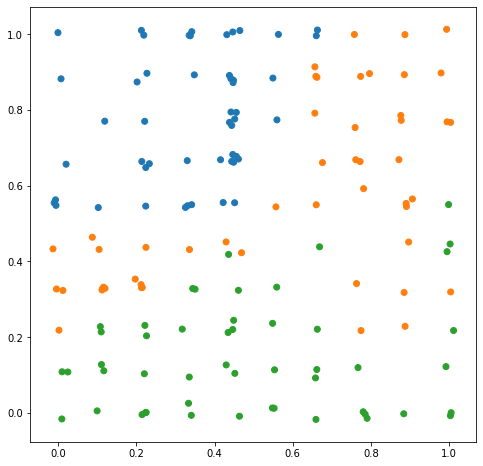

CPU times: user 504 ms, sys: 208 ms, total: 713 ms
Wall time: 438 ms


In [14]:
%%time
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               bases=100, 
               epochs=5000,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()



Wine
---

epoch 0  /  7000  --  48363.57281610671
epoch 350  /  7000  --  12408.666729826653
epoch 700  /  7000  --  6223.437270614759
epoch 1050  /  7000  --  8045.238683988743
epoch 1400  /  7000  --  9445.20771877532
epoch 1750  /  7000  --  15593.469427255339
epoch 2100  /  7000  --  7142.760354039345
epoch 2450  /  7000  --  6681.08377222807
epoch 2800  /  7000  --  9820.11944928925
epoch 3150  /  7000  --  5981.449483211205
epoch 3500  /  7000  --  6601.037364687047
epoch 3850  /  7000  --  4198.1378741479375
epoch 4200  /  7000  --  5258.45578535952
epoch 4550  /  7000  --  5280.381942163422
epoch 4900  /  7000  --  2669.6828543930224
epoch 5250  /  7000  --  3215.747708040355
epoch 5600  /  7000  --  2015.1304149281636
epoch 5950  /  7000  --  1782.3761975542416
epoch 6300  /  7000  --  988.7879079861104
epoch 6650  /  7000  --  91.21558643619535
Time to fit transform 0.3041963577270508


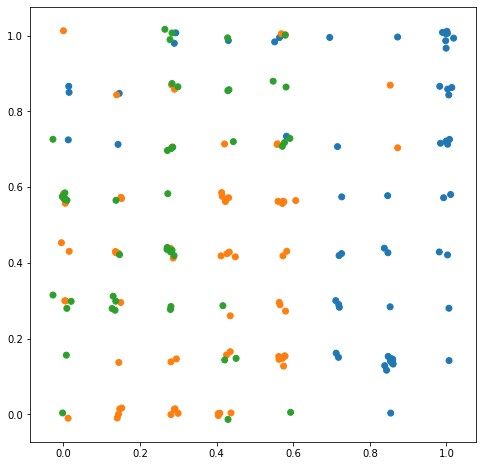

CPU times: user 525 ms, sys: 221 ms, total: 746 ms
Wall time: 468 ms


In [13]:
%%time
from sklearn.datasets import load_wine

wine = load_wine()

x = wine.data
y = wine.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               epochs=7000,
               bases=64, 
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()

Breast Cancer
---

epoch 0  /  1000  --  60871.0614746011
epoch 50  /  1000  --  22773.320989447588
epoch 100  /  1000  --  17094.10829792005
epoch 150  /  1000  --  26148.054014334735
epoch 200  /  1000  --  15503.733594579155
epoch 250  /  1000  --  18172.982524845815
epoch 300  /  1000  --  21471.40978955578
epoch 350  /  1000  --  10405.025119919479
epoch 400  /  1000  --  14625.807892229015
epoch 450  /  1000  --  25476.411922875857
epoch 500  /  1000  --  9249.080103543965
epoch 550  /  1000  --  13151.010781487772
epoch 600  /  1000  --  10076.061980700262
epoch 650  /  1000  --  9573.005096629964
epoch 700  /  1000  --  11251.031495612968
epoch 750  /  1000  --  7034.676925640879
epoch 800  /  1000  --  2794.1285215049065
epoch 850  /  1000  --  2268.837154363108
epoch 900  /  1000  --  1252.5911813404384
epoch 950  /  1000  --  329.72876765615456
Time to fit transform 0.07251334190368652


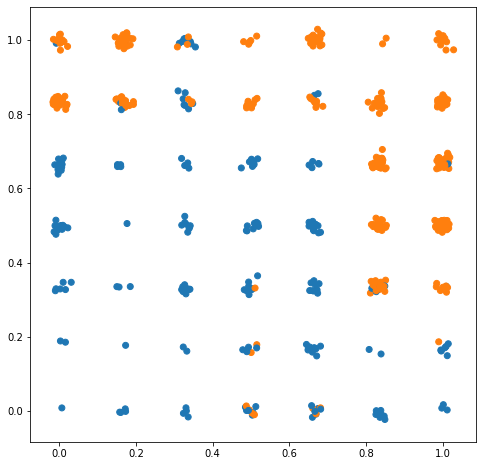

CPU times: user 348 ms, sys: 200 ms, total: 548 ms
Wall time: 271 ms


In [17]:
%%time
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

x = bc.data
y = bc.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               epochs=1000,
               bases=49, 
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()

Cancer on a line
---

epoch 0  /  2000  --  125279.2591850869
epoch 100  /  2000  --  26498.856333461343
epoch 200  /  2000  --  29643.31937153297
epoch 300  /  2000  --  30773.364171312573
epoch 400  /  2000  --  35961.73391187354
epoch 500  /  2000  --  19269.757554318494
epoch 600  /  2000  --  39333.91469842961
epoch 700  /  2000  --  34605.666432521706
epoch 800  /  2000  --  18705.964613907516
epoch 900  /  2000  --  18102.692106296836
epoch 1000  /  2000  --  21717.089678108227
epoch 1100  /  2000  --  11164.398132096678
epoch 1200  /  2000  --  12196.33868119788
epoch 1300  /  2000  --  11209.72786929383
epoch 1400  /  2000  --  14520.44924711291
epoch 1500  /  2000  --  7454.5531601376815
epoch 1600  /  2000  --  4839.1228965201035
epoch 1700  /  2000  --  6134.0759414742515
epoch 1800  /  2000  --  2086.761527106458
epoch 1900  /  2000  --  955.8040324062822
Time to fit transform 0.18747925758361816


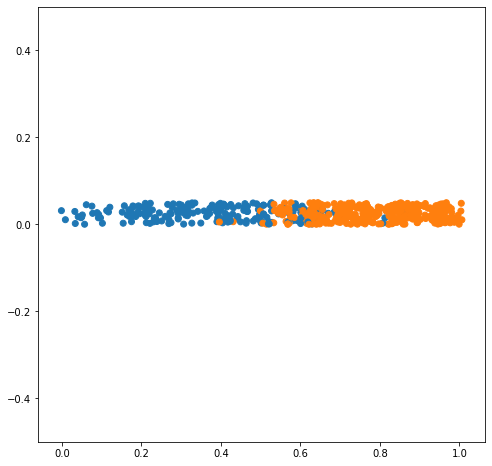

CPU times: user 403 ms, sys: 256 ms, total: 659 ms
Wall time: 380 ms


In [19]:
%%time
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

x = bc.data
y = bc.target

x = x - x.mean()

som = emby.SOM(Z=1, 
               epochs=2000,
               bases=100, 
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 1))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], np.random.rand(embeddings.size) * 0.05, color=colors[y])
plt.ylim([-0.5, 0.5])
plt.show()

CovType
---

epoch 0  /  5000  --  7248645.345108847
epoch 250  /  5000  --  1147806.8815753818
epoch 500  /  5000  --  1317321.467590484
epoch 750  /  5000  --  1498830.2202559174
epoch 1000  /  5000  --  1424877.2863860913
epoch 1250  /  5000  --  1606718.9540835274
epoch 1500  /  5000  --  1212821.0425331073
epoch 1750  /  5000  --  1631131.5189590228
epoch 2000  /  5000  --  1173102.0887242728
epoch 2250  /  5000  --  1331607.3260970912
epoch 2500  /  5000  --  1284296.162870226
epoch 2750  /  5000  --  1361834.9823247758
epoch 3000  /  5000  --  1360569.6814354442
epoch 3250  /  5000  --  1347032.505388796
epoch 3500  /  5000  --  1101548.5177618195
epoch 3750  /  5000  --  1107356.7706541368
epoch 4000  /  5000  --  964144.1208028739
epoch 4250  /  5000  --  787303.6599032182
epoch 4500  /  5000  --  674209.7854759651
epoch 4750  /  5000  --  308506.3683962079
Time to fit transform 18.851707458496094


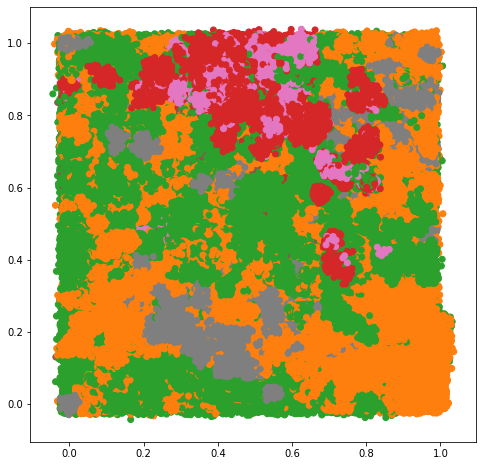

CPU times: user 38.7 s, sys: 772 ms, total: 39.5 s
Wall time: 38.5 s


In [22]:
%%time
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

x = data.data
y = data.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               epochs=5000,
               bases=1000,
               batch_size=50,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()